# Music Popularity Prediction
This project aims to predict the popularity category of a song—low, medium, or high listener counts—based on various extracted audio features. By leveraging machine learning techniques, the model classifies songs using key acoustic and metadata attributes.

### **Model Architecture:**
This project implements a **hybrid neural network model** with two separate branches:
- A **Sequential Branch (LSTM)** to process time-dependent features.
- A **Non-Sequential Branch (Dense)** to handle other features.

### **Features Used for Prediction:**

#### **1. MFCCs (Mel-Frequency Cepstral Coefficients)**
- Commonly used in audio processing and speech recognition.
- Captures timbral properties of the sound.

#### **2. Chroma**
- Represents the harmonic content of the audio.
- Helps in identifying tonal and harmonic structures.

#### **3. Spectral Contrast**
- Measures the difference in amplitude between peaks and valleys in a spectrum.
- Useful for distinguishing between different timbres and textures in music.

#### **4. Tonnetz**
- Captures harmonic relations in music.
- Helps in identifying tonal shifts and harmonic progressions.

#### **5. RMS (Root Mean Square)**
- Measures the signal’s energy.
- Represents the perceived loudness of a track.

#### **6. Spectral Rolloff**
- The frequency below which a certain percentage of the total spectral energy lies.
- Helps in distinguishing between percussive and harmonic sounds.

#### **7. Zero-Crossing Rate**
- The rate at which the signal changes sign.
- Commonly used in classifying percussive sounds.

#### **8. Length**
- The total duration of the audio track.

#### **9. Language**
- The detected language of the song.

## **Required Dependencies** ⚙️  
Ensure you have the following packages installed before running the notebook:

In [1]:
!pip install tensorflow keras-tuner numpy scikit-learn pandas matplotlib seaborn

The code snippet below performs the following tasks:
1. Defines the File Path
2. Reads the CSV File

In [2]:
import pandas as pd

file_path = "data/all_data.csv"
df = pd.read_csv(file_path)

The following code performs two data cleaning operations on the DataFrame `df`:

1. Filter out rows with NaN values in the 'listeners' column
2. Filter out rows where 'listeners' is 0

In [3]:
# Filter out rows with NaN values in the 'listeners' column
df = df[df['listeners'].notna()]

# Filter out rows where 'listeners' is 0
df = df[df['listeners'] != 0]
df.head()

,track_id_number,track_id,track_name,artist_name,location,listeners,genre,Country,Capital,Latitude,...,Tonnetz2,Tonnetz3,Tonnetz4,Tonnetz5,Tonnetz6,RMS,SpectralRolloff,ZeroCrossingRate,Length,Language
0,1,Saoko,Saoko,Rosalía,Spain,1374833,Traditional,Spain,Madrid,40.42,...,0.031682,0.031099,0.049473,0.010867,-0.011590,0.226229,4086.001064,0.095356,140.202132,es
1,2,LA+FAMA,LA FAMA,Rosalía,Spain,1374833,Traditional,Spain,Madrid,40.42,...,0.126945,0.053468,0.035345,-0.006220,0.009974,0.271468,2803.446239,0.059665,251.379274,es
2,3,Spanish+Caravan,Spanish Caravan,The Doors,United States,4214537,Traditional,United States,Washington D.C.,38.88,...,-0.067584,0.138996,0.009897,-0.000284,0.004213,0.059760,4195.064707,0.097843,178.306667,en
3,4,MALAMENTE+-+Cap.1:+Augurio,MALAMENTE - Cap.1: Augurio,Rosalía,Spain,1374833,Traditional,Spain,Madrid,40.42,...,0.103094,0.069495,0.033981,-0.015257,0.012077,0.243367,3184.956769,0.052307,168.085351,es
4,5,Chicken+Teriyaki,Chicken Teriyaki,Rosalía,Spain,1374833,Traditional,Spain,Madrid,40.42,...,0.015080,-0.024649,-0.018667,0.015736,-0.007838,0.261582,4304.387237,0.071205,133.886304,es


The following code is used to clean and prepare the DataFrame `df` for predicting the popularity of songs, focusing on the relevant musical features:

1. Drop the unneeded columns:
     - **'location', 'genre', 'Country', 'Capital', 'Latitude', 'Longitude'**: These columns are related to geographical and categorical data, which are not needed when the goal is to predict song popularity based on musical features. This ensures that only the musical attributes are considered during the prediction.
   
2. Display the updated DataFrame to verify the removal**

In [4]:
# Drop the unneeded columns
df = df.drop(columns=['location', 'genre', 'Country', 'Capital', 'Latitude', 'Longitude'])

# Display the updated DataFrame to verify the removal
df.head()

,track_id_number,track_id,track_name,artist_name,listeners,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,...,Tonnetz2,Tonnetz3,Tonnetz4,Tonnetz5,Tonnetz6,RMS,SpectralRolloff,ZeroCrossingRate,Length,Language
0,1,Saoko,Saoko,Rosalía,1374833,-87.781052,110.309486,-8.193514,12.189231,-7.424947,...,0.031682,0.031099,0.049473,0.010867,-0.011590,0.226229,4086.001064,0.095356,140.202132,es
1,2,LA+FAMA,LA FAMA,Rosalía,1374833,-142.864670,129.827835,5.117205,23.859261,5.489446,...,0.126945,0.053468,0.035345,-0.006220,0.009974,0.271468,2803.446239,0.059665,251.379274,es
2,3,Spanish+Caravan,Spanish Caravan,The Doors,4214537,-208.096588,98.872444,-13.651766,36.340504,-1.073513,...,-0.067584,0.138996,0.009897,-0.000284,0.004213,0.059760,4195.064707,0.097843,178.306667,en
3,4,MALAMENTE+-+Cap.1:+Augurio,MALAMENTE - Cap.1: Augurio,Rosalía,1374833,-144.406586,103.702049,5.672822,21.341652,10.030981,...,0.103094,0.069495,0.033981,-0.015257,0.012077,0.243367,3184.956769,0.052307,168.085351,es
4,5,Chicken+Teriyaki,Chicken Teriyaki,Rosalía,1374833,-137.848801,85.967781,3.030798,22.190674,2.829472,...,0.015080,-0.024649,-0.018667,0.015736,-0.007838,0.261582,4304.387237,0.071205,133.886304,es


The following code provides a clear visual representation of how the number of listeners is distributed across the dataset.

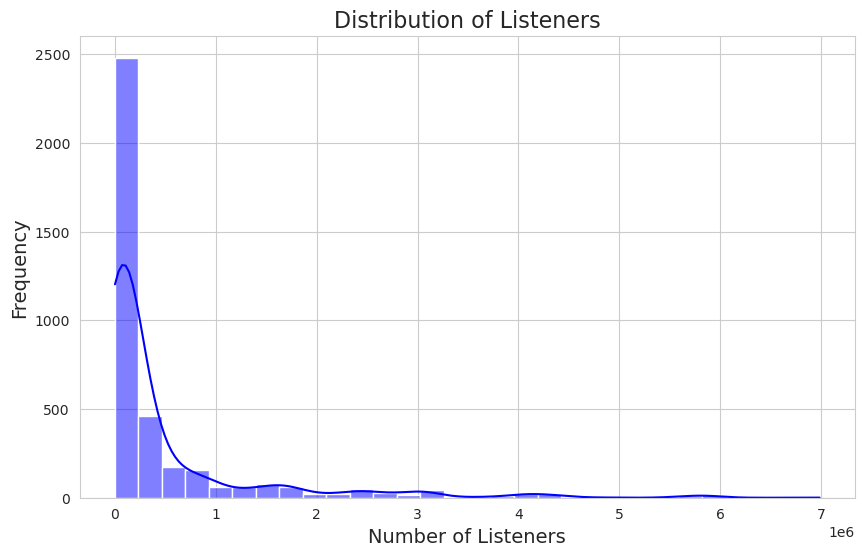

In [5]:
# Import the required libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for the plot
sns.set_style('whitegrid')

# Plot a histogram of the 'listeners' column
plt.figure(figsize=(10, 6))  # Set the figure size
sns.histplot(df['listeners'], bins=30, kde=True, color='blue')

# Add titles and labels
plt.title('Distribution of Listeners', fontsize=16)
plt.xlabel('Number of Listeners', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.show()

The following code classifies the 'listeners' data into different categories (low, medium, high) based on the quantiles and adds a new column to the DataFrame `df` to store the category for each song:

1. Calculate the low and high thresholds
2. Create a function to categorize listeners
   - The function `categorize_listeners(value)` classifies the listeners into three categories:
     - **'low'**: if the value is less than or equal to the 33rd percentile (low_threshold).
     - **'medium'**: if the value is between the 33rd and 66th percentiles.
     - **'high'**: if the value is greater than the 66th percentile.

3. Apply the categorization function to the 'listeners' column
4. Display the number of rows in each category
5. Print the threshold values
6. Preview the DataFrame

This code provides a simple way to categorize songs into three popularity levels based on the number of listeners.


In [6]:
low_threshold = df['listeners'].quantile(0.33)
high_threshold = df['listeners'].quantile(0.66)

# Create a new column 'category' to classify listeners
def categorize_listeners(value):
    if value <= low_threshold:
        return 'low'
    elif value <= high_threshold:
        return 'medium'
    else:
        return 'high'

df['category'] = df['listeners'].apply(categorize_listeners)

# Display the number of rows in each category
print(df['category'].value_counts())

# Print the threshold values
print(f"Low threshold (33rd percentile): {low_threshold}")
print(f"High threshold (66th percentile): {high_threshold}")

# Preview the DataFrame
df.head()

category
high      1292
low       1255
medium    1254
Name: count, dtype: int64
Low threshold (33rd percentile): 43640.0
High threshold (66th percentile): 241866.0


,track_id_number,track_id,track_name,artist_name,listeners,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,...,Tonnetz3,Tonnetz4,Tonnetz5,Tonnetz6,RMS,SpectralRolloff,ZeroCrossingRate,Length,Language,category
0,1,Saoko,Saoko,Rosalía,1374833,-87.781052,110.309486,-8.193514,12.189231,-7.424947,...,0.031099,0.049473,0.010867,-0.011590,0.226229,4086.001064,0.095356,140.202132,es,high
1,2,LA+FAMA,LA FAMA,Rosalía,1374833,-142.864670,129.827835,5.117205,23.859261,5.489446,...,0.053468,0.035345,-0.006220,0.009974,0.271468,2803.446239,0.059665,251.379274,es,high
2,3,Spanish+Caravan,Spanish Caravan,The Doors,4214537,-208.096588,98.872444,-13.651766,36.340504,-1.073513,...,0.138996,0.009897,-0.000284,0.004213,0.059760,4195.064707,0.097843,178.306667,en,high
3,4,MALAMENTE+-+Cap.1:+Augurio,MALAMENTE - Cap.1: Augurio,Rosalía,1374833,-144.406586,103.702049,5.672822,21.341652,10.030981,...,0.069495,0.033981,-0.015257,0.012077,0.243367,3184.956769,0.052307,168.085351,es,high
4,5,Chicken+Teriyaki,Chicken Teriyaki,Rosalía,1374833,-137.848801,85.967781,3.030798,22.190674,2.829472,...,-0.024649,-0.018667,0.015736,-0.007838,0.261582,4304.387237,0.071205,133.886304,es,high


This code processes the 'Language' column in the DataFrame `df` by encoding the language names into numerical values. It uses the Keras `Tokenizer` to assign unique integer values to each language. The encoded values are then stored in a new column, and the original 'Language' column is removed. Finally, the 'Language' column is renamed and reordered to appear before the 'category' column in the DataFrame.

The result is a cleaned and numerically encoded version of the 'Language' data, ready for further analysis or training.

In [7]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenize language column
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['Language'])

# Convert languages to integer sequences
df['language_encoded'] = tokenizer.texts_to_sequences(df['Language'])

# Since language is a single word, each sequence is a single number
df['language_encoded'] = df['language_encoded'].apply(lambda x: x[0] if x else 0)

# Convert to NumPy array for training
import numpy as np
X_language = np.array(df['language_encoded']).reshape(-1, 1)
df.drop(columns=['Language'], inplace=True)  # Remove the original Language column
df.rename(columns={'language_encoded': 'Language'}, inplace=True)  # Rename encoded column
# Move 'Language' before 'category'
cols = df.columns.tolist()  # Get current column order
cols.remove('Language')  # Remove 'Language' from the list
cols.insert(cols.index('category'), 'Language')  # Insert 'Language' before 'category'

# Reorder the DataFrame
df = df[cols]

In [8]:
# Select Features and Target
X_seq = df.iloc[:, 4:24].values  # MFCC1 to MFCC20 (sequential features)
X_nonseq = df.iloc[:, 24:-1].values  # Spectral Contrast, Tonnetz, etc. (non-sequential features)
y = df['category'].values  # Target variable

# Label Encoding and One-Hot Encoding

The following code transforms the 'category' column, which contains categorical labels, into a format suitable for training a machine learning model.

1. Label Encoding:
   - `label_encoder = LabelEncoder()` creates an instance of the `LabelEncoder` class from `sklearn`, which is used to convert categorical labels into numeric labels.
   - `y = label_encoder.fit_transform(df['category'])` fits the `LabelEncoder` to the 'category' column of the DataFrame `df` and transforms the labels into integers. For example, 'low', 'medium', and 'high' might be encoded as 0, 1, and 2, respectively.

2. One-Hot Encoding:
   - `y = to_categorical(y)` converts the integer-encoded labels into **one-hot encoding**. In one-hot encoding, each label is represented as a binary vector where only the index corresponding to the label is set to 1, and all other positions are set to 0. 
   - For example, if the label is `1` (representing 'medium'), the one-hot encoding will be `[0, 1, 0]` (where the middle element corresponds to the 'medium' category).


In [9]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Apply LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['category'])
# Convert the encoded labels to one-hot encoding
y = to_categorical(y)

df.head()

,track_id_number,track_id,track_name,artist_name,listeners,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,...,Tonnetz3,Tonnetz4,Tonnetz5,Tonnetz6,RMS,SpectralRolloff,ZeroCrossingRate,Length,Language,category
0,1,Saoko,Saoko,Rosalía,1374833,-87.781052,110.309486,-8.193514,12.189231,-7.424947,...,0.031099,0.049473,0.010867,-0.011590,0.226229,4086.001064,0.095356,140.202132,2,high
1,2,LA+FAMA,LA FAMA,Rosalía,1374833,-142.864670,129.827835,5.117205,23.859261,5.489446,...,0.053468,0.035345,-0.006220,0.009974,0.271468,2803.446239,0.059665,251.379274,2,high
2,3,Spanish+Caravan,Spanish Caravan,The Doors,4214537,-208.096588,98.872444,-13.651766,36.340504,-1.073513,...,0.138996,0.009897,-0.000284,0.004213,0.059760,4195.064707,0.097843,178.306667,1,high
3,4,MALAMENTE+-+Cap.1:+Augurio,MALAMENTE - Cap.1: Augurio,Rosalía,1374833,-144.406586,103.702049,5.672822,21.341652,10.030981,...,0.069495,0.033981,-0.015257,0.012077,0.243367,3184.956769,0.052307,168.085351,2,high
4,5,Chicken+Teriyaki,Chicken Teriyaki,Rosalía,1374833,-137.848801,85.967781,3.030798,22.190674,2.829472,...,-0.024649,-0.018667,0.015736,-0.007838,0.261582,4304.387237,0.071205,133.886304,2,high


# Feature Normalization

Feature normalization ensures that all input features are on a similar scale. This helps improve model training stability and convergence.

In [10]:
from sklearn.preprocessing import StandardScaler
# Normalize the features
scaler_seq = StandardScaler()
X_seq = scaler_seq.fit_transform(X_seq)

scaler_nonseq = StandardScaler()
X_nonseq = scaler_nonseq.fit_transform(X_nonseq)

# Data Preparation: Reshaping and Splitting  

Before training a machine learning model, it is essential to properly format the data. This step involves reshaping the sequential features to match the input requirements for an LSTM model and then splitting the dataset into training and testing sets.


In [11]:
from sklearn.model_selection import train_test_split

# Reshape sequential features for LSTM (timesteps = number of MFCCs, features = 1)
X_seq = X_seq.reshape((X_seq.shape[0], X_seq.shape[1], 1))

# Split data into training and testing sets
X_seq_train, X_seq_test, X_nonseq_train, X_nonseq_test, y_train, y_test = train_test_split(
    X_seq, X_nonseq, y, test_size=0.2, random_state=42
)

# Hyperparameter Tuning and Model Training with LSTM and Dense Layers   

This script implements a **hybrid neural network model** with two separate branches:  
- A **Sequential Branch (LSTM)** to process time-dependent features.  
- A **Non-Sequential Branch (Dense)** to handle other features.  

It also applies **hyperparameter tuning** using **Keras Tuner**.

In [12]:
import kerastuner as kt
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, Concatenate, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


# Define a function to build the model for tuning
def build_model(hp):
    # Sequential branch (LSTM)
    seq_input = Input(shape=(X_seq_train.shape[1], X_seq_train.shape[2]), name="seq_input")
    x_seq = LSTM(hp.Int('lstm_units', min_value=32, max_value=128, step=32), return_sequences=False)(seq_input)
    x_seq = Dropout(hp.Float('dropout_seq', min_value=0.2, max_value=0.5, step=0.1))(x_seq)
    x_seq = BatchNormalization()(x_seq)
    
    # Non-sequential branch (Dense)
    nonseq_input = Input(shape=(X_nonseq_train.shape[1],), name="nonseq_input")
    x_nonseq = Dense(hp.Int('dense_units', min_value=32, max_value=128, step=32), activation='relu')(nonseq_input)
    x_nonseq = Dropout(hp.Float('dropout_nonseq', min_value=0.2, max_value=0.5, step=0.1))(x_nonseq)
    x_nonseq = BatchNormalization()(x_nonseq)
    
    # Combine both branches
    combined = Concatenate()([x_seq, x_nonseq])
    
    # Add Dense layers on top of the combined features
    x = Dense(hp.Int('dense_combined', min_value=64, max_value=256, step=64), activation='relu')(combined)
    x = Dropout(hp.Float('dropout_combined', min_value=0.2, max_value=0.5, step=0.1))(x)
    x = BatchNormalization()(x)
    output = Dense(3, activation='softmax')(x)
    
    # Create the model
    model = Model(inputs=[seq_input, nonseq_input], outputs=output)
    
    optimizer = Adam(learning_rate=hp.Float('learning_rate', min_value=1e-5, max_value=1e-3, sampling='LOG'))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Define the tuner
tuner = kt.Hyperband(build_model,
                     objective='val_accuracy',
                     max_epochs=100,
                     factor=3,
                     directory='tuning_results',
                     project_name='hyperparam_tuning')

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Search for the best parameters using the training and validation data
tuner.search([X_seq_train, X_nonseq_train], y_train,
             validation_data=([X_seq_test, X_nonseq_test], y_test),
             epochs=100,
             batch_size=32,
             callbacks=[early_stopping])

Trial 254 Complete [00h 00m 48s]
val_accuracy: 0.7752956748008728

Best val_accuracy So Far: 0.9855453372001648
Total elapsed time: 00h 24m 41s


## Hyperparameter Tuning Results Processing

The following script processes hyperparameter tuning results stored in JSON files and compiles them into a structured Pandas DataFrame for analysis.

#### **1. Setup & Initialization**
- Defines the directory (`tuning_results/hyperparam_tuning`) containing hyperparameter tuning results.
- Initializes an empty list to store extracted trial results.

#### **2. Iterating Through Trials**
- Loops through each trial directory in the results folder.
- Reads and loads `trial.json` files if they exist.

#### **3. Extracting Relevant Data**
- Retrieves hyperparameter values, including:
  - `lstm_units`, `dropout_seq`, `dense_units`, `dropout_nonseq`, `dense_combined`, `dropout_combined`, and `learning_rate`.
- Extracts the validation accuracy (`val_accuracy`) from the metrics section.

#### **4. Creating a DataFrame**
- Converts the collected data into a Pandas DataFrame.
- Prints the first few rows for inspection.

In [23]:
import numpy as np
import pandas as pd
import os
import json

tuning_results_dir = './tuning_results/hyperparam_tuning'  # Relative path to the hyperparameter tuning results folder

# List to store the trial data
all_trial_results = []


for trial_dir in os.listdir(tuning_results_dir):
    trial_path = os.path.join(tuning_results_dir, trial_dir, 'trial.json')
    if os.path.exists(trial_path):
        with open(trial_path, 'r') as f:
            trial_data = json.load(f)
            
            # Extract hyperparameters and validation accuracy/score from 'values' and 'metrics'
            result = {
                'trial_id': trial_data.get('trial_id'),
                'lstm_units': trial_data['hyperparameters']['values'].get('lstm_units'),
                'dropout_seq': trial_data['hyperparameters']['values'].get('dropout_seq'),
                'dense_units': trial_data['hyperparameters']['values'].get('dense_units'),
                'dropout_nonseq': trial_data['hyperparameters']['values'].get('dropout_nonseq'),
                'dense_combined': trial_data['hyperparameters']['values'].get('dense_combined'),
                'dropout_combined': trial_data['hyperparameters']['values'].get('dropout_combined'),
                'learning_rate': trial_data['hyperparameters']['values'].get('learning_rate'),
                'val_accuracy': trial_data['metrics']['metrics']['val_accuracy']['observations'][0]['value'][0]  # Extracting val_accuracy
            }
            all_trial_results.append(result)

# Convert the results to a DataFrame
trial_results_df = pd.DataFrame(all_trial_results)

# Display the first few rows of the DataFrame
print(trial_results_df.head())

  trial_id  lstm_units  dropout_seq  dense_units  dropout_nonseq   
0     0000          96          0.3           64             0.4  \
1     0001         128          0.3           64             0.4   
2     0002          32          0.2           96             0.3   
3     0003          32          0.2           96             0.4   
4     0004          64          0.3           64             0.4   

   dense_combined  dropout_combined  learning_rate  val_accuracy  
0              64               0.3       0.000079      0.344284  
1             192               0.2       0.000074      0.354796  
2              64               0.4       0.000017      0.357424  
3             128               0.2       0.000089      0.385020  
4             256               0.2       0.000012      0.342970  


## Hyperparameter Tuning Visualization

The following script visualizes the relationship between various hyperparameters and validation accuracy using box plots.

### **Key Components:**

#### **1. Plot Function**
- `plot_hyperparameter_vs_accuracy(df, param_name, title, xlabel, ylabel='Validation Accuracy')`
  - Generates a box plot of the specified hyperparameter (`param_name`) against validation accuracy.
  - Uses Seaborn for visualization and rotates x-axis labels for better readability.

#### **2. Generated Plots**
The script creates the following visualizations:
- **LSTM Units vs Validation Accuracy**
- **Dropout (Seq) vs Validation Accuracy**
- **Dense Units vs Validation Accuracy**
- **Dropout (Non-Seq) vs Validation Accuracy**
- **Dense Combined vs Validation Accuracy**
- **Dropout (Combined) vs Validation Accuracy**

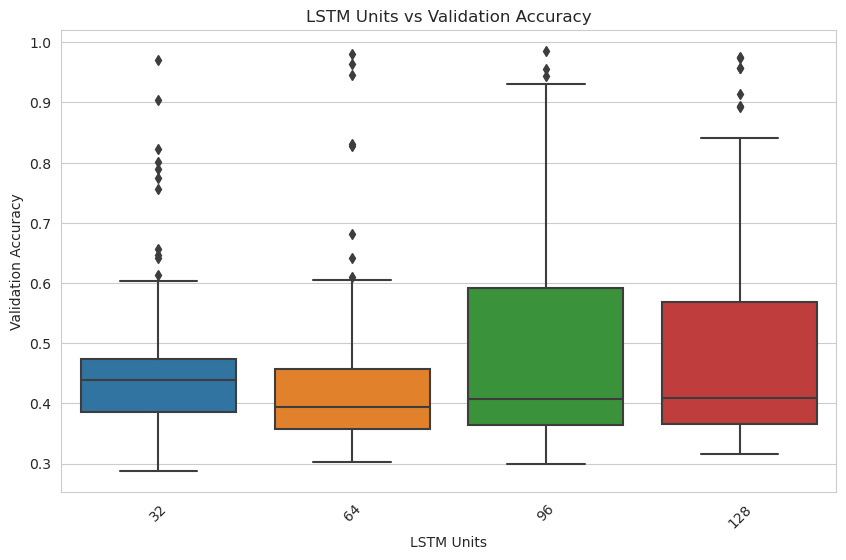

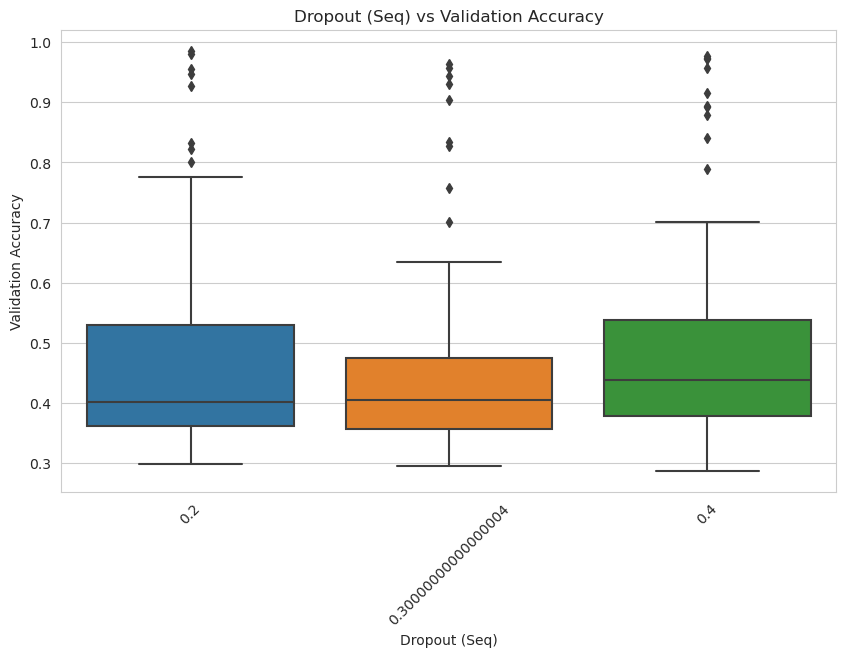

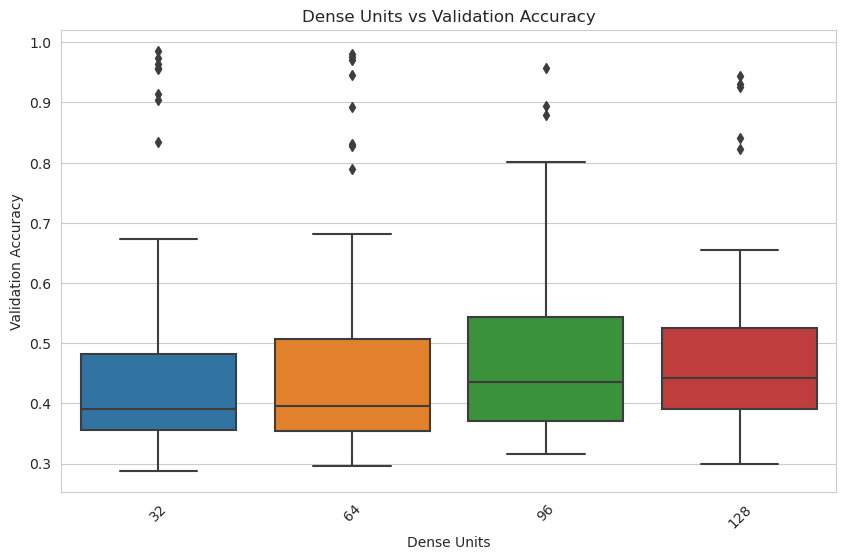

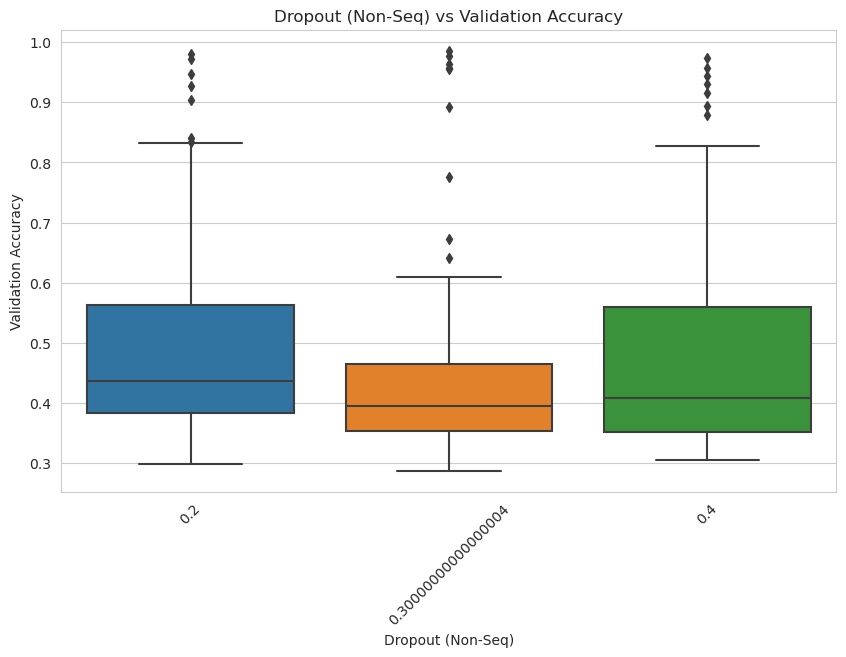

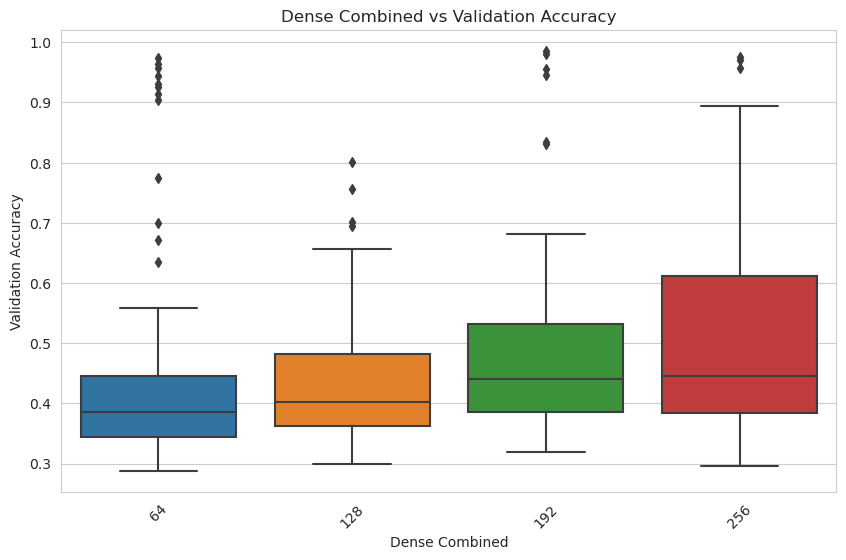

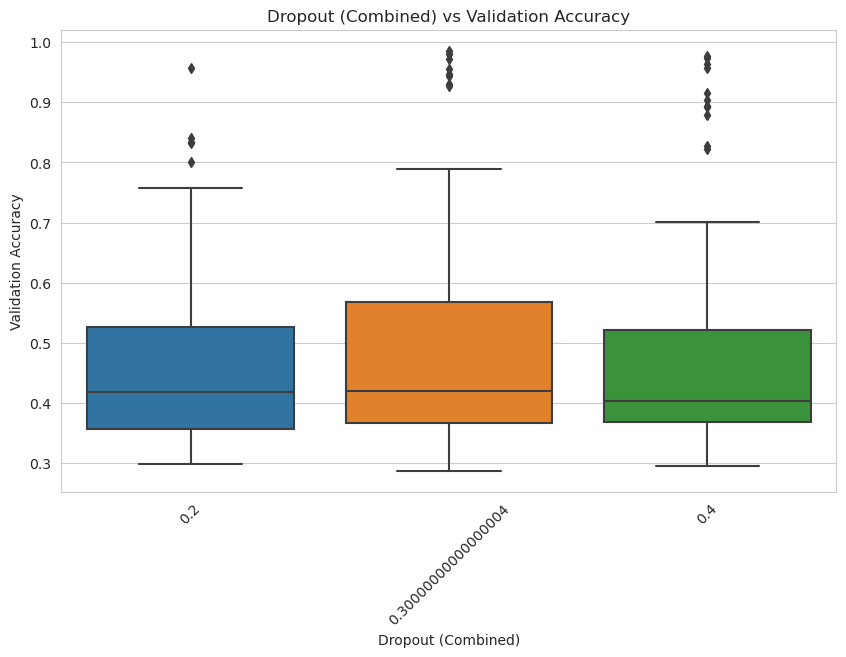

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Plot a function for hyperparameter vs validation accuracy
def plot_hyperparameter_vs_accuracy(df, param_name, title, xlabel, ylabel='Validation Accuracy'):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=param_name, y='val_accuracy', data=df)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)  # Rotate labels for better readability
    plt.show()

# Plot for lstm_units vs val_accuracy
plot_hyperparameter_vs_accuracy(trial_results_df, 'lstm_units', 'LSTM Units vs Validation Accuracy', 'LSTM Units')

# Plot for dropout_seq vs val_accuracy
plot_hyperparameter_vs_accuracy(trial_results_df, 'dropout_seq', 'Dropout (Seq) vs Validation Accuracy', 'Dropout (Seq)')

# Plot for dense_units vs val_accuracy
plot_hyperparameter_vs_accuracy(trial_results_df, 'dense_units', 'Dense Units vs Validation Accuracy', 'Dense Units')

# Plot for dropout_nonseq vs val_accuracy
plot_hyperparameter_vs_accuracy(trial_results_df, 'dropout_nonseq', 'Dropout (Non-Seq) vs Validation Accuracy', 'Dropout (Non-Seq)')

# Plot for dense_combined vs val_accuracy
plot_hyperparameter_vs_accuracy(trial_results_df, 'dense_combined', 'Dense Combined vs Validation Accuracy', 'Dense Combined')

# Plot for dropout_combined vs val_accuracy
plot_hyperparameter_vs_accuracy(trial_results_df, 'dropout_combined', 'Dropout (Combined) vs Validation Accuracy', 'Dropout (Combined)')

## Learning Rate vs Validation Accuracy Visualization

This script analyzes the relationship between the learning rate and validation accuracy by discretizing learning rate values and plotting them using a box plot.

### **Key Components:**

#### **1. Learning Rate Range Calculation**
- Finds the minimum and maximum learning rate values in the dataset.
- Generates evenly spaced learning rates on a logarithmic scale between the minimum and maximum values.

#### **2. Discretizing Learning Rate**
- Converts continuous learning rate values into categorical bins.
- Uses `pd.cut` to segment learning rate values into bins defined by log-spaced ticks.
- Labels each bin using scientific notation for readability.

#### **3. Visualization**
- Creates a box plot using Seaborn to display the relationship between discretized learning rate values and validation accuracy.
- Rotates x-axis labels for better readability.

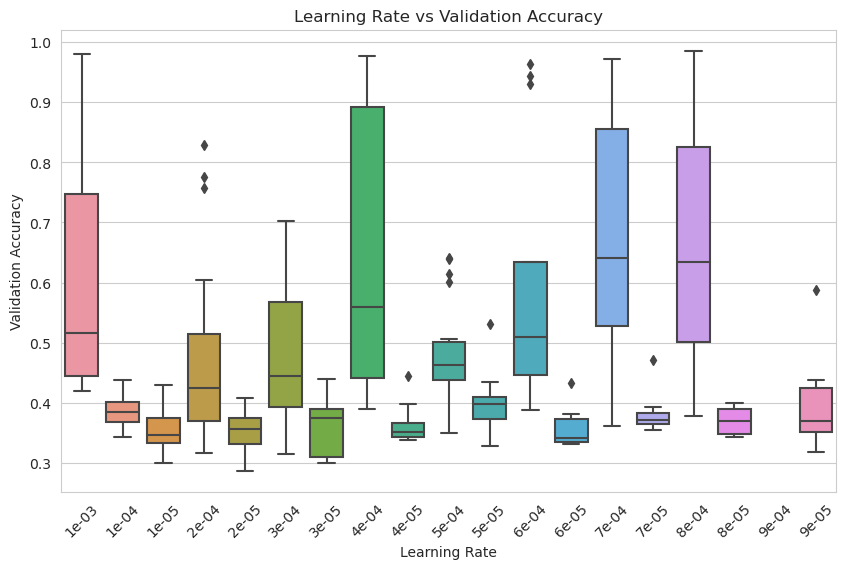

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Find the minimum and maximum learning rate values in the dataset
min_lr = trial_results_df['learning_rate'].min()
max_lr = trial_results_df['learning_rate'].max()

# Evenly spaced learning rates on a log scale between the min and max values
learning_rate_ticks = np.logspace(np.log10(min_lr), np.log10(max_lr))

# Discretize the learning_rate for the boxplot (so it's treated as a categorical variable)
trial_results_df['learning_rate_discrete'] = pd.cut(
    trial_results_df['learning_rate'],
    bins=learning_rate_ticks,
    labels=[f"{lr:.0e}" for lr in learning_rate_ticks[1:]],
    include_lowest=True,
    ordered=False  # This allows duplicate labels
)

# Plot Learning Rate vs validation accuracy with the discretized learning rate
plt.figure(figsize=(10, 6))
sns.boxplot(x='learning_rate_discrete', y='val_accuracy', data=trial_results_df)

# Customize the plot labels and title
plt.title('Learning Rate vs Validation Accuracy')
plt.xlabel('Learning Rate')
plt.ylabel('Validation Accuracy')

# Show the plot
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()

## Best Model Training and Evaluation

The following script selects the best hyperparameters from tuning, trains the corresponding model, and evaluates its performance.

### **Key Components:**

#### **1. Selecting the Best Hyperparameters**
- Retrieves the best hyperparameters from the tuner using `tuner.get_best_hyperparameters(num_trials=1)[0]`.
- Builds the model using the selected hyperparameters.

#### **2. Training the Model**
- Trains the model with the best hyperparameters on the dataset.
- Uses 100 epochs and a batch size of 32 (adjustable based on tuning settings).
- Includes validation data for performance tracking.

#### **3. Plotting Training and Validation Loss**
- Plots training loss and validation loss over epochs.
- Uses Matplotlib to visualize model convergence.

#### **4. Identifying the Best Epoch**
- Extracts validation accuracies from the training history.
- Identifies the epoch with the highest validation accuracy.
- Prints the best epoch and corresponding validation accuracy.

Epoch 1/100
95/95 [==============================] - 2s 7ms/step - loss: 1.3769 - accuracy: 0.3503 - val_loss: 1.1030 - val_accuracy: 0.3443
Epoch 2/100
95/95 [==============================] - 0s 4ms/step - loss: 1.2379 - accuracy: 0.3980 - val_loss: 1.0833 - val_accuracy: 0.3561
Epoch 3/100
95/95 [==============================] - 0s 5ms/step - loss: 1.1410 - accuracy: 0.4303 - val_loss: 0.9877 - val_accuracy: 0.4849
Epoch 4/100
95/95 [==============================] - 0s 5ms/step - loss: 1.0061 - accuracy: 0.4826 - val_loss: 0.9191 - val_accuracy: 0.5020
Epoch 5/100
95/95 [==============================] - 0s 5ms/step - loss: 0.9464 - accuracy: 0.5188 - val_loss: 1.1599 - val_accuracy: 0.4993
Epoch 6/100
95/95 [==============================] - 0s 5ms/step - loss: 0.9183 - accuracy: 0.5362 - val_loss: 0.9456 - val_accuracy: 0.5085
Epoch 7/100
95/95 [==============================] - 0s 5ms/step - loss: 0.8907 - accuracy: 0.5457 - val_loss: 0.9664 - val_accuracy: 0.5046
Epoch 8/100
9

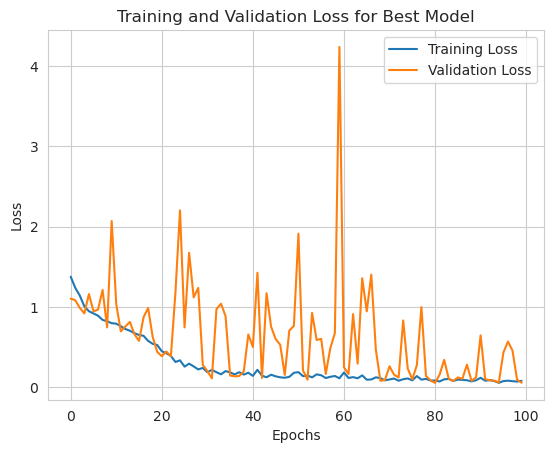

Best Epoch: 81 (since epochs are 0-indexed)
Best Validation Accuracy: 0.9842


In [27]:
import matplotlib.pyplot as plt

# Retrieve the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters
best_model = build_model(best_hps)  # Make sure the build_model function is the one used in tuning

# Train the model on the data
history = best_model.fit(
    [X_seq_train, X_nonseq_train], y_train,
    epochs=100,  # Adjust based on the number of epochs you used in tuning
    batch_size=32,
    validation_data=([X_seq_test, X_nonseq_test], y_test),
)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss for Best Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Get the validation accuracies for each epoch from the history object
val_accuracies = history.history['val_accuracy']

# Find the epoch with the highest validation accuracy
best_epoch = np.argmax(val_accuracies)  # This gives the index of the max accuracy
best_val_accuracy = val_accuracies[best_epoch]  # The best validation accuracy

# Print the best epoch and the corresponding validation accuracy
print(f"Best Epoch: {best_epoch + 1} (since epochs are 0-indexed)")
print(f"Best Validation Accuracy: {best_val_accuracy:.4f}")

## Confusion Matrix Analysis

This script evaluates the model's classification performance using a confusion matrix and calculates accuracy based on predictions.

### **Key Components:**

#### **1. Making Predictions**
- Uses the trained model to predict class probabilities on the test dataset.
- Converts predicted probabilities into class labels using `np.argmax`.

#### **2. Generating True Labels**
- Extracts true class labels from `y_test`, ensuring compatibility if one-hot encoding is used.

#### **3. Creating a Confusion Matrix**
- Computes the confusion matrix using `confusion_matrix(y_true, y_pred_classes)`.
- Calculates accuracy by dividing the sum of correct predictions (trace) by the total samples.

#### **4. Visualizing the Confusion Matrix**
- Stores the confusion matrix as a Pandas DataFrame with labeled rows and columns.
- Uses Seaborn to create a heatmap for better visualization.

24/24 [==============================] - 0s 1ms/step
Accuracy from Confusion Matrix: 0.9763


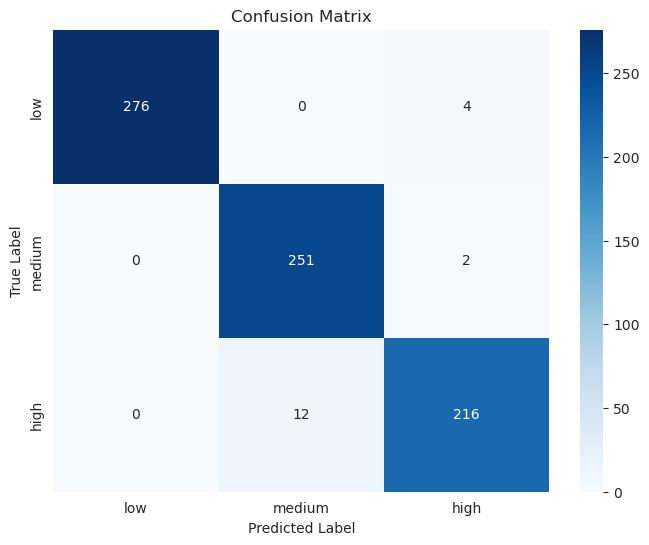

In [28]:
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Make predictions using the model at the best epoch
y_pred = best_model.predict([X_seq_test, X_nonseq_test])
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predicted probabilities to class labels

# Generate the true labels (in case they're one-hot encoded)
y_true = np.argmax(y_test, axis=1)  # Convert true labels to class indices if they are one-hot encoded

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Calculate accuracy from the confusion matrix
accuracy_from_cm = np.trace(cm) / np.sum(cm)  # Trace is the sum of the diagonal (correct predictions), sum is the total samples

# Print the accuracy from the confusion matrix
print(f"Accuracy from Confusion Matrix: {accuracy_from_cm:.4f}")

# Store confusion matrix results in a DataFrame
cm_df = pd.DataFrame(cm, columns=['low', 'medium', 'high'], index=['low', 'medium', 'high'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Show the plot
plt.show()